In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.metrics import error_rate

In [4]:
# run constants
bs = 64
size = 224
stage1_lr = 3e-3
srage2_lr = slice(1e-6, 1e-4)
normalize = False
model = models.resnet18
#res34: bs64, size224
#res18: bs1024, size300

In [5]:
untar_path = untar_data(URLs.PETS)
img_path = untar_path/'images'
label_path = untar_path/'annotations'
img_fnames = get_image_files(img_path)

np.random.seed(2)
pattern = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(img_path, img_fnames, pattern, ds_tfms = get_transforms(), size=size, bs=bs)
if normalize: data = data.normalize(imagenet_stats)

In [15]:
learn = cnn_learner(data, model, metrics=error_rate)

In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


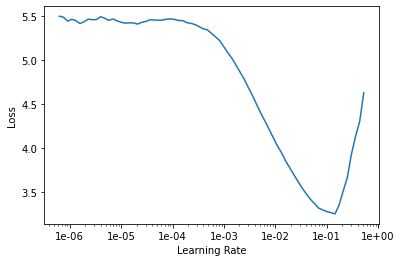

In [8]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(8, max_lr = stage1_lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.952911,0.434890,0.131258,00:12
1,0.804915,0.318234,0.104195,00:10
2,0.518420,0.364101,0.116373,00:12
3,0.441820,0.329185,0.104871,00:14
4,0.349819,0.298703,0.093369,00:14
5,0.270301,0.284017,0.084574,00:15
6,0.222294,0.273145,0.082544,00:14
7,0.201368,0.265764,0.075101,00:14


In [17]:
learn.unfreeze()

In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


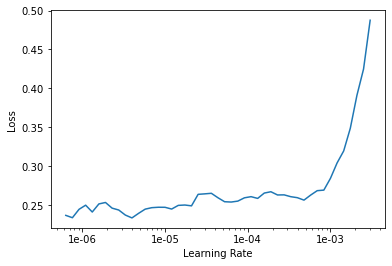

In [12]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4, max_lr=srage2_lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.194954,0.255670,0.079838,00:15
1,0.180921,0.260505,0.075101,00:15
2,0.170896,0.255058,0.074425,00:15
3,0.153184,0.258783,0.077808,00:15


In [19]:
metric = learn.recorder.metrics[-1][0]

In [ ]:
learn.destroy()

## Grid search

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.metrics import error_rate
import pandas as pd
gc.collect()

0

In [2]:
# run constants
g_bs = [16, 32, 64, 128, 256]
g_size = [100, 150, 200, 250, 300]
stage1_lr = 3e-3
srage2_lr = slice(1e-6, 1e-4)
normalize = True
model = models.resnet18

In [3]:
df = pd.DataFrame(columns=['bs', 'size', 'model', 'normalize', 'error_rate'])

In [4]:
#df = df.append({'bs': bs, 'size': size, 'model':model.__name__, 'normalize':normalize, 'error_rate':0.08}, ignore_index=True)
#df

In [ ]:
for size in g_size:
    for bs in g_bs:
        
        print('model: {0}, {1}'.format(bs, size))
        untar_path = untar_data(URLs.PETS)
        img_path = untar_path/'images'
        label_path = untar_path/'annotations'
        img_fnames = get_image_files(img_path)

        np.random.seed(2)
        pattern = r'/([^/]+)_\d+.jpg$'
        data = ImageDataBunch.from_name_re(img_path, img_fnames, pattern, ds_tfms = get_transforms(), size=size, bs=bs)
        if normalize: data = data.normalize(imagenet_stats)

        learn = cnn_learner(data, model, metrics=error_rate)
        learn.fit_one_cycle(4, max_lr = stage1_lr)
        learn.unfreeze()
        learn.fit_one_cycle(2, max_lr=srage2_lr)
        metric = learn.recorder.metrics[-1][0]
        learn.destroy()
        
        df = df.append({'bs': bs, 'size': size, 'model':model.__name__, 'normalize':normalize, 'error_rate':metric}, ignore_index=True)

model: 16, 100


epoch,train_loss,valid_loss,error_rate,time
0,1.972953,1.117316,0.352503,00:09
1,1.482955,1.006524,0.298376,00:08
2,1.212917,0.751568,0.232070,00:08
3,0.993188,0.704537,0.221922,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.911605,0.686677,0.222598,00:09
1,0.849515,0.670410,0.217185,00:08


this Learner object self-destroyed - it still exists, but no longer usable
model: 32, 100


epoch,train_loss,valid_loss,error_rate,time
0,2.061808,1.152506,0.345737,00:07
1,1.374546,0.887336,0.261164,00:06
2,0.999339,0.708823,0.221245,00:07
3,0.809938,0.638660,0.198917,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.794470,0.629809,0.190122,00:07
1,0.745540,0.618235,0.194858,00:07


this Learner object self-destroyed - it still exists, but no longer usable
model: 64, 100


epoch,train_loss,valid_loss,error_rate,time
0,2.640624,1.057814,0.316644,00:07
1,1.404799,0.818111,0.259811,00:08
2,1.046897,0.682380,0.215832,00:08
3,0.798685,0.668597,0.212449,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.739287,0.652321,0.206360,00:08
1,0.696187,0.640977,0.201624,00:07


this Learner object self-destroyed - it still exists, but no longer usable
model: 128, 100


epoch,train_loss,valid_loss,error_rate,time
0,3.177851,1.188684,0.319350,00:08
1,1.792395,0.816942,0.257781,00:08
2,1.240657,0.695261,0.225981,00:09
3,0.974132,0.672597,0.215832,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.757274,0.665463,0.215832,00:09
1,0.745572,0.654165,0.209743,00:09


this Learner object self-destroyed - it still exists, but no longer usable
model: 256, 100


epoch,train_loss,valid_loss,error_rate,time
0,3.746113,1.389961,0.374154,00:11
1,2.293971,0.864514,0.255074,00:11
2,1.630531,0.751704,0.240189,00:11
3,1.284132,0.726519,0.236130,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.837263,0.714388,0.230041,00:11
1,0.815402,0.706347,0.230717,00:12


this Learner object self-destroyed - it still exists, but no longer usable
model: 16, 150


epoch,train_loss,valid_loss,error_rate,time
0,1.313560,0.701559,0.221922,00:09
1,1.208220,0.561796,0.170501,00:09
2,0.791178,0.420885,0.130582,00:10
3,0.662504,0.380543,0.119756,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.633506,0.370725,0.112991,00:12
1,0.627374,0.360093,0.108931,00:11


this Learner object self-destroyed - it still exists, but no longer usable
model: 32, 150


epoch,train_loss,valid_loss,error_rate,time
0,1.385158,0.575772,0.182679,00:09
1,0.906707,0.518799,0.160352,00:09
2,0.652676,0.414526,0.129905,00:09
3,0.510965,0.391505,0.120433,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.441136,0.369669,0.118403,00:09
1,0.404775,0.369013,0.115020,00:10


this Learner object self-destroyed - it still exists, but no longer usable
model: 64, 150


epoch,train_loss,valid_loss,error_rate,time
0,1.754750,0.532181,0.162382,00:10
1,0.886522,0.465917,0.145467,00:09
2,0.605575,0.391264,0.121110,00:09
3,0.450075,0.358178,0.115020,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.409073,0.348485,0.110284,00:10
1,0.390824,0.349898,0.111637,00:10


this Learner object self-destroyed - it still exists, but no longer usable
model: 128, 150


epoch,train_loss,valid_loss,error_rate,time
0,2.355654,0.530719,0.166441,00:11
1,1.174329,0.410526,0.127199,00:11
2,0.748599,0.362908,0.118403,00:11
3,0.546260,0.346529,0.106225,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.403516,0.337039,0.105548,00:10
1,0.400996,0.338383,0.106225,00:11


this Learner object self-destroyed - it still exists, but no longer usable
model: 256, 150


epoch,train_loss,valid_loss,error_rate,time
0,2.979819,0.628325,0.195535,00:14
1,1.589617,0.423210,0.129229,00:13
2,1.055525,0.380419,0.123816,00:13
3,0.785840,0.375074,0.125169,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.449002,0.366554,0.123139,00:14
1,0.430336,0.363564,0.117727,00:13


this Learner object self-destroyed - it still exists, but no longer usable
model: 16, 200


epoch,train_loss,valid_loss,error_rate,time
0,1.054172,0.552995,0.186062,00:11
1,0.893231,0.496764,0.145467,00:11
2,0.622917,0.325562,0.102842,00:11
3,0.484857,0.295948,0.099459,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.479048,0.291610,0.092693,00:14
1,0.423055,0.281326,0.089310,00:14


this Learner object self-destroyed - it still exists, but no longer usable
model: 32, 200


epoch,train_loss,valid_loss,error_rate,time
0,1.099293,0.456514,0.138701,00:10
1,0.709338,0.433276,0.140731,00:10
2,0.511949,0.315046,0.099459,00:10
3,0.383115,0.296095,0.089986,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.326090,0.281559,0.088633,00:12
1,0.297423,0.279591,0.087280,00:12


this Learner object self-destroyed - it still exists, but no longer usable
model: 64, 200


epoch,train_loss,valid_loss,error_rate,time
0,1.504943,0.405680,0.130582,00:10
1,0.699053,0.372774,0.121786,00:10
2,0.459887,0.312487,0.101489,00:10
3,0.330545,0.275940,0.096076,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.313927,0.270709,0.090663,00:12
1,0.290358,0.267989,0.089310,00:12


this Learner object self-destroyed - it still exists, but no longer usable
model: 128, 200


epoch,train_loss,valid_loss,error_rate,time
0,2.060440,0.408338,0.144790,00:12
1,0.975476,0.326784,0.110284,00:11
2,0.594877,0.288541,0.100135,00:12
3,0.422849,0.282310,0.095399,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.290779,0.268198,0.093369,00:14
1,0.277082,0.265490,0.092693,00:13


this Learner object self-destroyed - it still exists, but no longer usable
model: 256, 200


epoch,train_loss,valid_loss,error_rate,time
0,2.775193,0.461035,0.150203,00:17
1,1.411015,0.310776,0.104195,00:15
2,0.909776,0.286060,0.099459,00:15
3,0.652794,0.277694,0.099459,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.319118,0.271813,0.089986,00:17
1,0.315707,0.269927,0.092016,00:16


this Learner object self-destroyed - it still exists, but no longer usable
model: 16, 250


epoch,train_loss,valid_loss,error_rate,time
0,0.899496,0.452767,0.131935,00:21
1,0.899787,0.436598,0.134641,00:13
2,0.584115,0.287363,0.092693,00:14
3,0.406001,0.255592,0.090663,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.403100,0.250119,0.085927,00:22
1,0.301266,0.241914,0.081191,00:21


this Learner object self-destroyed - it still exists, but no longer usable
model: 32, 250


epoch,train_loss,valid_loss,error_rate,time
0,0.990409,0.402328,0.132612,00:17


In [ ]:
df.to_pickle('lect1-res18.pickle')

In [ ]:
#learn.destroy()